<a href="https://colab.research.google.com/github/ToAN7/SIC_AI/blob/TrongKha_/__AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#install thư viện

In [ ]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=a9598368329b20989bdd1846c7d97cf73e80058851818032f1ef7d7f6b763165
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
!pip install spicy

In [ ]:
!pip install spatial

  Preparing metadata (setup.py) ... done
  Created wheel for spatial: filename=spatial-0.2.0-py3-none-any.whl size=8484 sha256=adf01cdf2ca2c244abc6ca30a160d6577f55abad54dc57f4713d1ba438f6f2fc
  Stored in directory: /root/.cache/pip/wheels/b3/a9/45/5776d9357e179ab80f60dfbf7d002d095f1a7c5d8f86104bd3
Successfully built spatial


In [ ]:
import pandas as pd

#import các thư viện

In [ ]:
from sklearn.svm import SVR# mô hình chạy thử
import pandas as pd# lấy dữ liệu
import numpy as np # tính toán
import matplotlib.pyplot as plt # vẽ đồ thị
from sentence_transformers import SentenceTransformer # Doc2Vec với dữ liệu dùng để kiểm thử
from sklearn.cluster import KMeans # Clustering
from sklearn.model_selection import train_test_split # Chia dữ liệu
from sklearn.model_selection import cross_val_score, KFold # đánh giá mô hình
from sklearn.metrics import accuracy_score # đánh giá mô hình
import re # tiền xử lý
import string # tiền xử lý
import umap # giảm chiều dữ liệu
from sklearn.decomposition import PCA # giảm chiều dữ liệu
from scipy.spatial.distance import pdist, squareform # Tìm tâm cụm
from sklearn.metrics.pairwise import euclidean_distances #tính khoảng cách đầu vào và so sánh với tâm cụm
from sklearn.svm import OneClassSVM # Phân loại

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


#Pre-train model  SentenceTransformer('keepitreal/vietnamese-sbert')

In [ ]:
model = SentenceTransformer('keepitreal/vietnamese-sbert')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/752 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#Hàm dùng để chuyển dữ liệu đầu vào thành dữ liệu cho mô hình dự đoán

In [ ]:
vietnamese_stop_words = [
              'là', 'và', 'có', 'trên', 'cho', 'một', 'các', 'được', 'như', 'với',
              'của', 'ở', 'khi', 'đã', 'còn', 'thì', 'này', 'bởi', 'đó', 'để', 'năm',
              'ngày', 'vào', 'sau', 'tại', 'trong', 'rằng', 'đến', 'từ'
              ]

In [ ]:
def convertData(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub("\\W"," ",text)
  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.*?>+',b'',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text = re.sub('\w*\d\w*','',text)
  text = re.sub(' +', ' ',text)
  text = text.strip()
  text = ' '.join([word for word in text.split() if word not in vietnamese_stop_words])
  encode_text = model.encode(text)
  return encode_text.reshape(1,-1)# reshape  về kiểu dữ liệu phù hợp với model <tuỳ chỉnh với mỗi loại>

#Lấy dữ liệu ra từ drive

In [25]:
data = pd.read_csv('/content/drive/MyDrive/SIC/Embeddings_DATA.csv')

In [ ]:
data.drop(columns=['Unnamed: 0'],inplace=True)# Xoá cột index cho chắc

In [26]:
data.shape # (8943,768), embeddings sẽ chuyển hoá dữ liệu text sang 768 vector

(8943, 769)

In [ ]:
data.drop(19)
data.reset_index(drop=True,inplace=True)

In [ ]:
data.shape
data = data.drop(19)
data.reset_index(drop=True,inplace=True)
data.to_csv('/content/drive/MyDrive/SIC/Embeddings_DATA.csv')

In [23]:
data_1 = pd.read_csv("/content/drive/MyDrive/Data_/DATA_.csv")

In [24]:
data_1.shape

(8943, 4)

In [ ]:
# data_1.drop(columns=['Unnamed: 0'],inplace=True)
# data_1.reset_index(drop=True,inplace=True)
# data_1 = data_1.drop(19)
data_1.reset_index(drop=True,inplace=True)
data_1.shape

(8943, 3)

#Gọi SVR để train

In [ ]:
model_SVR = SVR(kernel='rbf', C=100, epsilon=0.1) # C: Tham số điều chỉnh độ phạt lỗi của mỗi mô hình
#epsilon xác định ngưỡng các lỗi nhỏ hơn ngưỡng này sẽ không được tính vào loss function

<h1>Chia dữ liệu để train</h1>

In [ ]:
# # Dữ liệu không có nhãn, nên ta sẽ dùng Kmeans để gán nhãn (Không an toàn)
# X_train, X_test, y_train, y_test = train_test_split
# # random_state đảm bảo sự khả đoán và tái sử dụng khi chia dữ liệu (đảm bảo tính nhất quán)

# Gọi Kmeans

In [ ]:
model_Kmeans = KMeans(n_clusters=2, random_state=42) # Số cluster là 2 (nhằm tìm tâm cụm)

In [ ]:
model_Kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [ ]:
kmean_labels = model_Kmeans.labels_
# Thêm nhãn cụm vào dữ liệu gốc
data_with_labels = data.copy()
data_with_labels['kmean_labels'] = kmean_labels

# Chia dữ liệu sau khi gán nhãn bằng Kmeans

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(data_with_labels, kmean_labels, test_size=0.2, random_state=42)


NameError: name 'data_with_labels' is not defined

<h2> huấn luyện mô hình hồi quy SVR </h2>

In [ ]:
model_SVR.fit(X_train, y_train)

SVR(C=100)

#Kiểm thử-SVR

In [ ]:
new_text = "Trấn Thành đấm trẻ con, làm cho cây cối bị chết hết."
test = convertData(new_text)
test = pd.DataFrame(test).T
# test['kmean_labels'] = model_Kmeans.predict(test.T)
for i in range(10):
  test['kmean_labels'] = i
  test.columns = test.columns.astype(str)
  print(model_SVR.predict(test))
  test.drop(columns=['kmean_labels'],inplace=True)

[1.87098578]
[2.33001039]
[2.92561992]
[3.63726277]
[4.43681842]
[5.28987043]
[6.15736971]
[6.99776553]
[7.76964427]
[8.43479269]


In [ ]:
kfl = KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(model_SVR, X_train, y_train, cv=kfl)
print(f'Accuracy: {np.mean(score)}')

Accuracy: 0.9966319724930249


#Tính threshold

In [ ]:
#Tìm centroids ở trung tâm để lấy ngưỡng nó làm chung
def find_centroid_central(centroids):
  distance = pdist(centroids)
  distance_max = squareform(distance)
  avg_distance = np.mean(distance_max, axis=1)#tính khoảng cách trung bình của mỗi centroids đến các centroids khác
  centroid_central_distance = np.argmin(avg_distance)
  return centroid_central_distance

In [ ]:
# def caculate_thresholds(model, data, cluster_numb):
#   if cluster_numb > model.n_clusters | cluster_numb == None:
#     return None
#   centroid_central_ = find_centroid_central(model.cluster_centers_)
#   cluster_ = data[model.labels_ == centroid_central_]
#   distance = model.transform(cluster_)[:,centroid_central_]
#   threshold = np.mean(distance) + 2*np.std(distance)
#   return threshold, centroid_central_

#Trực quan hoá

In [ ]:
# threshold, centroid = caculate_thresholds(model_Kmeans, data, model_Kmeans.n_clusters) # tìm tâm của các tâm cụm và tính threshold

In [ ]:
labels = model_Kmeans.predict(data)

In [ ]:
centroids = model_Kmeans.cluster_centers_

In [ ]:
distance = model_Kmeans.transform(data)
min_distance = distance.min(axis=1)
max_distance = distance.max(axis=1)

In [ ]:
threshold = max_distance.sum()/len(max_distance) - min_distance.sum()/(len(min_distance))
print(threshold)

0.3445071115155507


In [ ]:
text = input()
text = convertData(text)
text = pd.DataFrame(text)

Tổng Bí Thư Nguyễn Phú Trọng còn sống


In [ ]:
centroids[0].shape

(768,)

In [ ]:
centroids[0].reshape(32,24)
centroids[1].reshape(32,24)
khoangcach = np.sqrt(np.sum((centroids[0] - centroids[1])**2))
print(khoangcach)

1.9104050800788706


In [ ]:
new_centroids = (centroids[0] + centroids[1])/2 # trung điểm giữa 2 tâm cụm

In [ ]:
new_centroids.shape

(768,)

In [ ]:
threshold

0.3445071115155507

In [ ]:
def hienthi_ketqua(centroids, new_centroids, threshold,text):# centroids và new_centroids là các tâm cụm, threshold là ngưỡng (được vẽ trên new_centroids), text là đầu vào (test-kiểm thử)
  plt.figure(figsize=(10, 6))
  plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=kmean_labels, cmap='viridis')
  plt.scatter(text.iloc[:,0],text.iloc[:,1], marker='o',color='blue',s=80)
  plt.scatter(centroids[:,0],centroids[:,1],marker='+',color='red',s=100)# s là kích thước của tất cả các điểm centroids, đặt 100 để chúng trở nên nổi bật hơn
  plt.scatter(new_centroids[0], new_centroids[1], marker='o',color='lightblue') # Plot new_centroids as a single point
  plt.plot([centroids[0:,0], centroids[0:,1]], [centroids[1:,0], centroids[1:,1]], '-')#  vẽ 1 đường thẳng
  # for centroid in centroids:
  #     circle = plt.Circle((centroid[0], centroid[1]), radius=threshold, color='red', fill=False, linestyle='--')
  for i in range(len(centroids) - 1):
        plt.plot([centroids[i, 0], centroids[i + 1, 0]], [centroids[i, 1], centroids[i + 1, 1]], '-') # kẻ 1 đường thẳng giữa 2 tâm
  cirlcle1 = plt.Circle((new_centroids[0], new_centroids[1]), radius=threshold, color='blue', fill=False, linestyle='--')
      # plt.gca().add_patch(circle)
  plt.gca().add_patch(cirlcle1)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('K-means Clustering')
  # plt.colorbar(label='Cluster')
  plt.show()

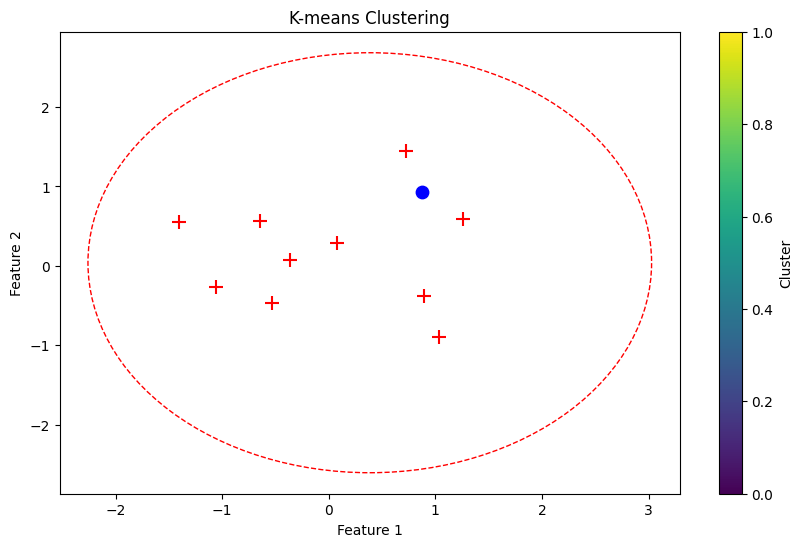

In [ ]:
plt.figure(figsize=(10, 6))
# plt.scatter(data_with_labels[:, 0], data_with_labels[:, 1], c=kmean_labels, cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],marker='+',color='red',s=100)# s là kích thước của tất cả các điểm centroids, đặt 100 để chúng trở nên nổi bật hơn
plt.scatter(text.iloc[:,0],text.iloc[:,1], marker='o',color='blue',s=80)
# plt.Circle(centroids[centroid], radius=threshold, color='red', fill=False, linestyle='--')#centroid là tâm điểm của các tâm cụm
circle = plt.Circle((centroids[0,centroid], centroids[1,centroid]), radius=threshold, color='red', fill=False, linestyle='--')
plt.gca().add_patch(circle)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

#Hàm kiểm tra ~ KMeans

In [ ]:
def is_Fake_news(text):
  text = convertData(text)
  # pca = PCA(n_components=2)
  # text = pca.fit_transform(text.reshape(-1,1)) #r
  text = pd.DataFrame(text)
  # distance = model_Kmeans.transform(text)
  # min_distance = distance.min()
  # max_distance = distance.max()
  # point_distance = max_distance-min_distance
  # point_distance_2 = (max_distance + min_distance)/(2*model_Kmeans.n_clusters)
  # p_distance = np.array([point_distance,point_distance_2])
  # print(type(distance))
  # print(p_distance)
  # distance_max = np.linalg.norm(text - new_centroids, axis=1)
  # distance_min = distance_max - threshold
  # distance = (distance_max/2)-(distance_min/2)
  distance = model_Kmeans.transform(text)
  min_distance = distance.min(axis=1)
  max_distance = distance.max(axis=1)
  # lt = np.linspace(8,9,100)
  # for i in lt:
  el = (threshold*(8.050505050505052)*(model_Kmeans.n_clusters)) # giá trị phạt
  dt = max_distance
  da = min_distance
  # print(dt)
  if max_distance > threshold:
    dt = dt/el
  elif min_distance > threshold:
    da = da/el
  thrsh = (dt + da)/(el*2*model_Kmeans.n_clusters - (dt-da))
    # print(distance_max)
    # print(distance_min
  # print(f'Khoảng cách tính được{thrsh}')
  # print(f'Ngưỡng của sự thật{threshold}')
  return thrsh < threshold #point_distance <

In [ ]:
def is_True(lt):
    if isinstance(lt, np.ndarray):
        count_true = np.sum(lt)
    else:
        count_true = sum(lt)
    return count_true > len(lt) / 2
#đếm số lần True

In [ ]:
print(threshold)

0.3445071115155507


In [ ]:
# text = 'Hơn 700 sinh viên tham gia chọn sống xanh tại ngày hội “OU Chọn Sống Xanh” trường Đại học Mở TP. Hồ Chí Minh năm 2024'
text = 'trấn thành trúng 30 tỉ'
# text = 'tổng thống putin đánh nhau với chinchong'
# text = 'Thông báo lịch thi tiếng Việt cho sinh viên quốc tế trình độ đại học – hình thức đào tạo chính quy học kỳ 3 năm học 2023-2024'
text = input()
print(is_Fake_news(text))
# print(is_True(is_Fake_news(text)))

Tổng thống putin đập nhau với trẻ em 3 tháng tuổi
Khoảng cách tính được[0.37184425]
Ngưỡng của sự thật0.3445071115155507
[False]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


def is_True(lt):
    if isinstance(lt, np.ndarray):
        count_true = np.sum(lt)
    else:
        count_true = sum(lt)
    return count_true > len(lt) / 2


#Trực quan hoá~Kmeans

In [ ]:
centroids = model_Kmeans.cluster_centers_

In [ ]:
# #hàm tính threshold của từng cụm
# def caculate_threshold(model, data):
#   distance = model.transform(data.drop('kmean_labels',axis=1))
#   threshold = np.mean(distance) + 2*np.std(distance)
#   return threshold

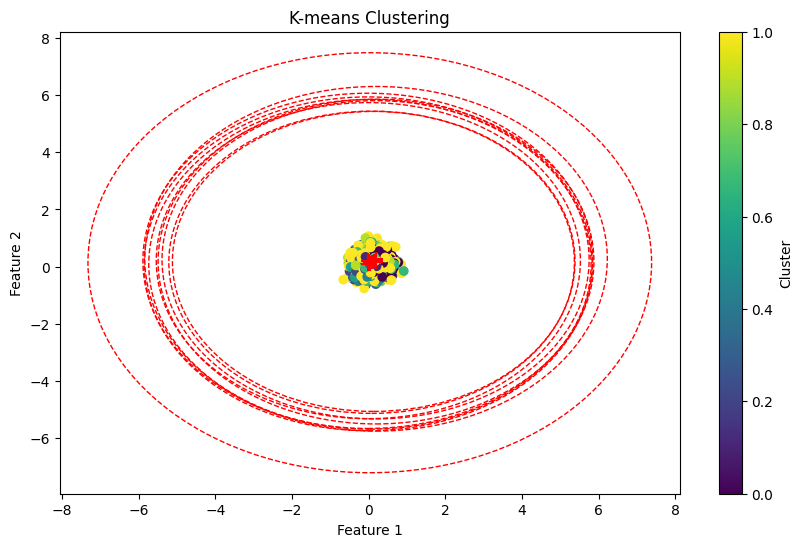

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_with_labels.iloc[:, 0], data_with_labels.iloc[:, 1], c=kmean_labels, cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1],marker='+',color='red',s=100)# s là kích thước của tất cả các điểm centroids, đặt 100 để chúng trở nên nổi bật hơn
for i in range(model_Kmeans.n_clusters):
  cluster_ = data_with_labels[data_with_labels['kmean_labels'] == i]
  th = caculate_threshold(model_Kmeans, cluster_)
  circle = plt.Circle((centroids[i,0], centroids[i,1]), radius=th, color='red', fill=False, linestyle='--')
  plt.gca().add_patch(circle)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

# OneClassSVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, data, test_size=0.2, random_state=42)

In [ ]:
model_ocsvm = OneClassSVM(nu=0.1, gamma='scale',kernel='rbf')

In [ ]:
X_train_ocsvm = X_train

In [ ]:
model_ocsvm.fit(X_train_ocsvm)

OneClassSVM(nu=0.1)

<h1> Trực quan hoá

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

In [ ]:
data = data.to_numpy()

In [ ]:
y_pred = model_ocsvm.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


In [ ]:
data_1 = pd.read_csv("/content/drive/MyDrive/Data_/DATA_.csv")

In [ ]:
data_1.drop(columns=['Unnamed: 0'],inplace=True)


In [ ]:
for i in data_1['Content'][:30]:
  text = ""
  for idx,j in enumerate(i):
    if idx < 150:
      text +=j
    else:
      print(text)
      break

Cuộc sống đời thường đến hoạt động cách mạng là minh chứng rõ nét nhất về việc hiện thực hóa lý tưởng, đạo đức cách mạng mà Tổng Bí thư Nguyễn Phú Trọ
Tổng Bí thư Nguyễn Phú Trọng là một con người luôn luôn nghĩ đến chuyện làm lợi ích cho người khác và ẩn trong con người là chất thép của người cộng s
Qua kiểm tra, lực lượng chức năng tạm giữ 4.448 sản phẩm hóa chất là dung môi pha mực in, nước tẩy rửa công nghiệp và hơn 11,7 tấn hàng hóa nghi là mậ
Xe ô tô chở 38 hành khách bất ngờ mất phanh, lao vào taluy dương bên quốc lộ 4D, đoạn thuộc thị xã Sa Pa, Lào Cai. Vụ tai nạn không có thiệt hại về ng
Ca sinh mổ diễn ra thuận lợi và thành công, đón ba bé (hai gái, một trai) chào đời. Các bé chào đời có phản xạ tốt, cân nặng lần lượt là 1,8kg, 2,0kg,
Lễ viếng đồng chí Nguyễn Phú Trọng được tổ chức tại Nhà tang lễ Quốc gia số 5 Trần Thánh Tông, Tp.Hà Nội, bắt đầu từ 7h đến 22h ngày 25/7/2024 và từ 7
Người đứng đầu Đảng trong tình cảm sâu nặng của quê nhà  Làng Lại Đà (xã Đông Hội, huyện Đông 

In [ ]:
#xóa 19, 101
# print([data_1['Content'][0] < 50])

[False]


In [ ]:
list_str = list()

In [ ]:
print(len(list_str))

33


In [ ]:
kl = pd.DataFrame(list_str)
kl.to_csv('list_str.csv')

In [ ]:
list_str.append('')

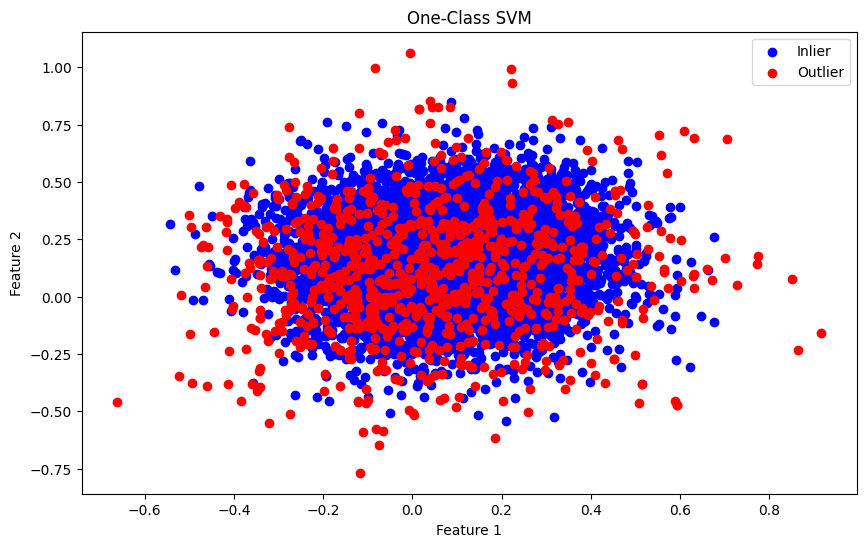

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data[y_pred == 1][:,0], data[y_pred == 1][:,1], c='blue', label='Inlier')
plt.scatter(data[y_pred == -1][:,0], data[y_pred == -1][:,1], c='red', label='Outlier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Inlier', 'Outlier'])
plt.title('One-Class SVM')
plt.show()
# :))) thấy không ổ
#chuan bi 200 tin gia
#moi tin gia tinh do tuong dong (neu < 50 thi xac xuat no laf tin gia)
#

#Kiểm thử

In [ ]:
y_pred = model_Kmeans.predict(data)

In [ ]:
y_pr = model_SVR.fit(data,y_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pr = model_SVR.predict(data)
mae = mean_absolute_error(y_pred, y_pr)
mse = mean_squared_error(y_pred, y_pr)
rmse = np.sqrt(mse)
r2 = r2_score(y_pred, y_pr)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.09519328365453295
Mean Squared Error: 0.00936572593278075
Root Mean Squared Error: 0.09677668072826609
R-squared: 0.9984101689873606


In [ ]:
def kiemthu(text):
  text = convertData(text)
  # text = pca.transform(text.reshape(-1,1)) #r
  text = pd.DataFrame(text)
  print("Dự đoán với OneClassSVM")
  print(model_ocsvm.predict(text) == 1)
  print("Dự đoán với SVR")
  text.columns = text.columns.astype(str)
  print(model_SVR.predict(text) < threshold)
  print("Dự đoán với Kmeans")
  # print(model_Kmeans.predict(text)) # bị lỗi Buffer dtype mismatch, expected 'const float' but got 'double'
  # print(is_True(is_Fake_news(text)))
  hienthi_ketqua(centroids, new_centroids, threshold,text)

tổng thống putin đánh nhau với chinchong
Dự đoán với OneClassSVM
[False]
Dự đoán với SVR
[False]
Dự đoán với Kmeans
Ngưỡng khoảng cách tính được[0.34942251]
Ngưỡng khoảng cách tính được[0.34899376]
Ngưỡng khoảng cách tính được[0.34856612]
Ngưỡng khoảng cách tính được[0.3481396]
Ngưỡng khoảng cách tính được[0.34771418]
Ngưỡng khoảng cách tính được[0.34728987]
Ngưỡng khoảng cách tính được[0.34686665]
Ngưỡng khoảng cách tính được[0.34644453]
Ngưỡng khoảng cách tính được[0.3460235]
Ngưỡng khoảng cách tính được[0.34560355]
Ngưỡng khoảng cách tính được[0.34518469]
Ngưỡng khoảng cách tính được[0.3447669]
Ngưỡng khoảng cách tính được[0.34435018]
Ngưỡng khoảng cách tính được[0.34393453]
Ngưỡng khoảng cách tính được[0.34351994]
Ngưỡng khoảng cách tính được[0.34310642]
Ngưỡng khoảng cách tính được[0.34269394]
Ngưỡng khoảng cách tính được[0.34228252]
Ngưỡng khoảng cách tính được[0.34187215]
Ngưỡng khoảng cách tính được[0.34146281]
Ngưỡng khoảng cách tính được[0.34105452]
Ngưỡng khoảng cách tính đư

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


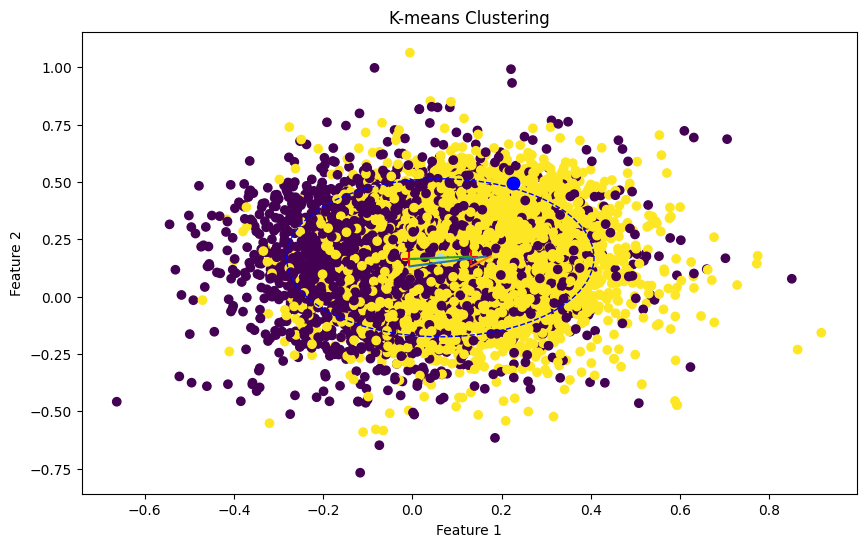

In [ ]:
s = input()
kiemthu(s)
#Trường Đại Học RMIT vừa bị phá sản do lũ được gây ra tại miền Nam, đặc biệt là khu vực Phước Kiển, huyện Nhà Bè

#Cross_val